# **Analisis Harga Batu Bara Tahun 2001–2021**

# **1. Deskripsi Data:**


Dataset ini berisi informasi historis mengenai harga batu bara global selama periode 2001 hingga 2021. Data ini umumnya digunakan untuk menganalisis tren harga batu bara, fluktuasi pasar energi, serta dampak faktor ekonomi dan geopolitik terhadap komoditas energi.

### **1.1 Struktur Data Awal**

**Jumlah Kolom:** 4 kolom

**Kolom:**

- Entity – Menunjukkan sumber atau lokasi asal batu bara.

- Code – Kode produksi .

- Year – Tahun data harga batu bara dicatat.

- Coal - Prices – Harga batu bara per ton dalam USD.

# **2. Eksplorasi dan Preprosesing Data**

### **2.1 Import library dan Memuat Data**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [42]:
df = pd.read_csv('coal-prices.csv') #create a pandas dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         147 non-null    object 
 1   Code           0 non-null      float64
 2   Year           147 non-null    int64  
 3   Coal - Prices  147 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.7+ KB


,Entity,Code,Year,Coal - Prices
0,Asian marker price (BP),NaN,2001,36.894600
1,Asian marker price (BP),NaN,2002,30.406666
2,Asian marker price (BP),NaN,2003,36.529198
3,Asian marker price (BP),NaN,2004,72.416664
4,Asian marker price (BP),NaN,2005,61.840000


### **2.2. Penanganan Nilai yang Hilang**

In [43]:
print(df.isnull().sum())

Entity             0
Code             147
Year               0
Coal - Prices      0
dtype: int64


In [44]:
del df['Code'] #delete the Code column
df = df.rename(columns={'Coal - Prices': 'Coal-Prices'}) #rename column for easier reading in future
df

,Entity,Year,Coal-Prices
0,Asian marker price (BP),2001,36.894600
1,Asian marker price (BP),2002,30.406666
2,Asian marker price (BP),2003,36.529198
3,Asian marker price (BP),2004,72.416664
4,Asian marker price (BP),2005,61.840000
...,...,...,...
142,US Central Appalachian coal spot price index (BP),2017,63.825291
143,US Central Appalachian coal spot price index (BP),2018,72.844009
144,US Central Appalachian coal spot price index (BP),2019,57.163982
145,US Central Appalachian coal spot price index (BP),2020,42.766369


# **3. Exploratory Data Analysis (EDA)**

In [45]:
the_ent = pd.unique(df.Entity)
print(len(the_ent))
print(the_ent)

7
['Asian marker price (BP)' 'China Qinhuangdao spot price (BP)'
 'Japan coking coal import CIF price (BP)'
 'Japan steam coal import CIF price (BP)'
 'Japan steam spot CIF price (BP)' 'Northwest Europe marker price (BP)'
 'US Central Appalachian coal spot price index (BP)']



Dataset memiliki 7 entitas unik (Entity) yang mewakili lokasi atau sumber batu bara.

In [46]:
df1 = pd.DataFrame(data=df, columns=['Entity', 'Coal-Prices'])
df_ent = df1.groupby('Entity').mean().reset_index()
df_ent

,Entity,Coal-Prices
0,Asian marker price (BP),83.944344
1,China Qinhuangdao spot price (BP),80.131865
2,Japan coking coal import CIF price (BP),120.079834
3,Japan steam coal import CIF price (BP),88.662885
4,Japan steam spot CIF price (BP),85.779958
5,Northwest Europe marker price (BP),76.542696
6,US Central Appalachian coal spot price index (BP),62.260257


Selama periode 20 tahun terakhir, Japan coking coal import CIF tercatat sebagai entitas dengan harga rata-rata batu bara tertinggi, sementara US Central Appalachian coal spot memiliki harga rata-rata terendah.

Jika kita melihat rata-rata harga batu bara per tahun, kita dapat memperoleh gambaran mengenai tren perubahan harga dari waktu ke waktu, termasuk tahun-tahun di mana terjadi kenaikan atau penurunan signifikan.

### **3.1 Analisis Tren Harga Batu Bara Global (2001–2021)**

In [47]:
df2= pd.DataFrame(data=df, columns=['Year', 'Coal-Prices'])
df_year = df2.groupby('Year').mean().reset_index()
df_year

,Year,Coal-Prices
0,2001,39.264029
1,2002,34.119481
2,2003,38.045251
3,2004,62.675577
4,2005,65.815172
5,2006,64.805783
6,2007,76.857225
7,2008,139.690853
8,2009,94.186808
9,2010,106.925704


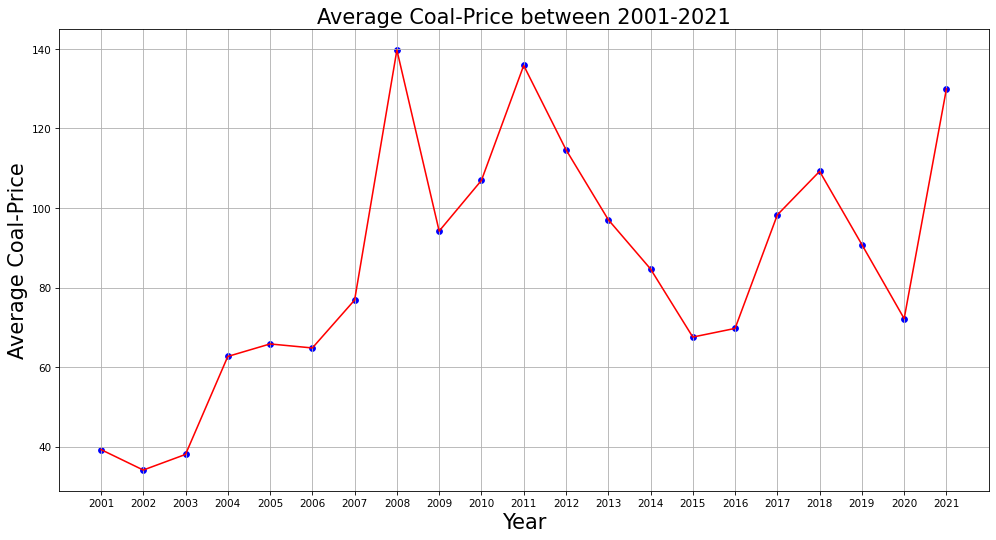

In [48]:
plt.figure(figsize=(16, 8), dpi=75)

plt.scatter(x=df_year.Year, y=df_year['Coal-Prices'], color='b', s=30)
plt.plot(df_year.Year, df_year['Coal-Prices'], color='r')
plt.xticks(np.arange(2001,2022, 1))
plt.xlabel('Year', size=20)
plt.ylabel('Average Coal-Price', size=20)
plt.title('Average Coal-Price between 2001-2021', size=20)
plt.grid()

plt.show()

Grafik menunjukkan tren kenaikan harga batu bara global dari 2001 hingga 2021, dengan dua lonjakan besar pada 2008 dan 2021 yang kemungkinan dipicu oleh krisis keuangan global dan pandemi Covid-19. Meskipun grafik mencerminkan rata-rata dari tujuh entitas, masing-masing entitas kemungkinan memiliki pola berbeda. Jepang diperkirakan mengalami lonjakan tajam pada 2011 akibat bencana tsunami Tohoku yang meningkatkan kebutuhan energi secara mendadak. Sementara itu, entitas dari Eropa dan AS menunjukkan kenaikan lebih moderat pada 2020–2021, diduga karena jarak geografis yang lebih jauh dari Tiongkok, yang memungkinkan proses pemulihan lebih cepat dan berdampak pada stabilitas harga batu bara.

### **3.2 Data per Entitas Secara Individual**

Berikut adalah grafik yang menunjukkan harga batu bara untuk masing-masing entitas secara individual selama periode 20 tahun. Saya membuat dua fungsi untuk melacak dan memvisualisasikan data tersebut:

- graph_maker() akan menghasilkan grafik tunggal yang menampilkan harga batu bara dari satu entitas tertentu dari waktu ke waktu, lengkap dengan proyeksi harga hingga tahun 2031 (10 tahun setelah data terakhir tersedia).

- multi_plot() akan menghasilkan grafik perbandingan antara harga entitas tertentu dengan rata-rata keseluruhan harga batu bara.

In [49]:
def graph_maker(dataf):
    plt.figure(figsize=(16, 8), dpi=75)
    plt.scatter(x=dataf.Year, y=dataf['Coal-Prices'], color= 'r', s=20)
    plt.plot(dataf.Year, dataf['Coal-Prices'], color='b')

    slope, intercept, rval, pval, std_err = linregress(x=dataf.Year, y=dataf['Coal-Prices'])
    p_years = list(range(2001,2032))
    pred_line = [slope*i + intercept for i in p_years]
    plt.plot(p_years, pred_line, color='k', linewidth=1)

    plt.xticks(np.arange(2001,2032, 1))
    plt.xlabel('Year', size=20)
    plt.ylabel('Coal-Price', size=20)
    plt.grid()

    return plt.gca(), (slope*p_years[-1] + intercept) #returns the plot and the predicted price at 2031


def multi_plot(dataf):
    xaxis = np.arange(2001,2022,1)

    plt.figure(figsize=(16, 8), dpi=75)

    #plot the specific entity's data
    plt.scatter(x=dataf.Year, y=dataf['Coal-Prices'], s=30, color='b')
    plt.plot(dataf.Year, dataf['Coal-Prices'], color='b', label=dataf._get_value(0,'Entity'))

    #plot the overall average data
    plt.scatter(x=df_year.Year, y=df_year['Coal-Prices'], s=30, color='r')
    plt.plot(df_year.Year, df_year['Coal-Prices'], color='r', label='Overall Average')

    plt.xticks(xaxis)
    plt.xlabel('Year', size=20)
    plt.ylabel('Coal-Price', size=20)
    plt.grid()
    plt.legend()

    return plt.gca()

### **Asian Marker** ###

At year 2031, the predicted coal price will be: 140.43192 USD per tonne.


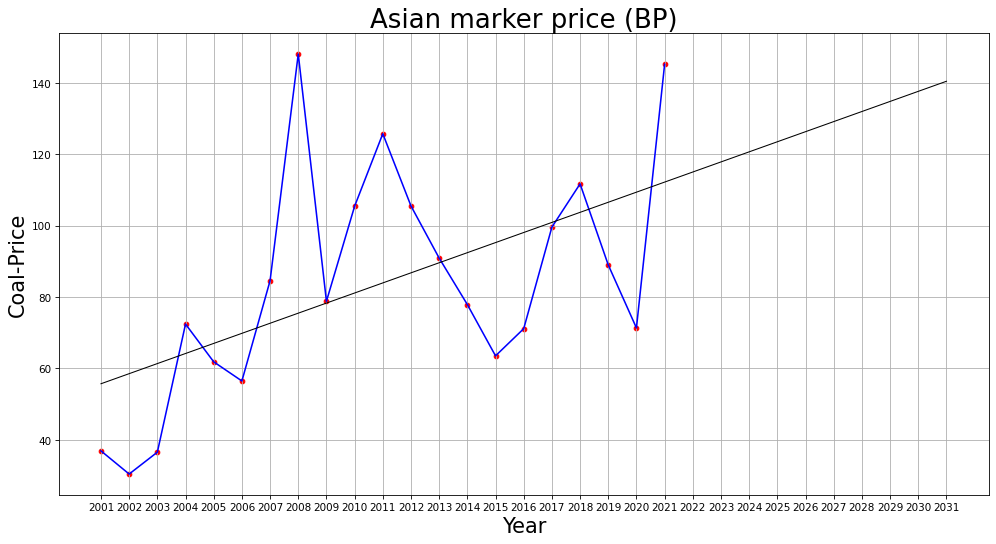

In [50]:
dfAsian = df.loc[df['Entity'] == 'Asian marker price (BP)']
AsianMP = graph_maker(dfAsian)
plt.title("Asian marker price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(AsianMP[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'Asian marker price VS. Overall Average')

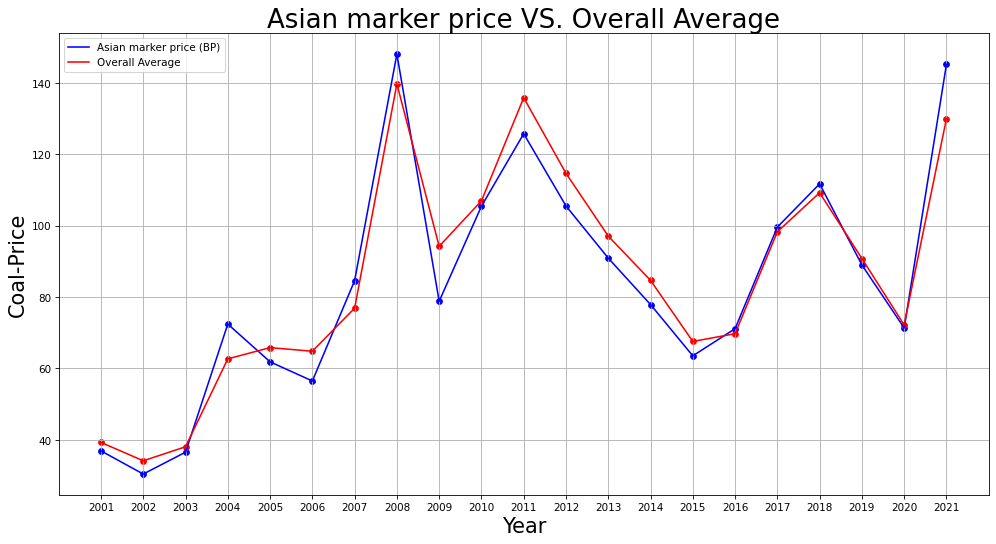

In [51]:
multi_plot(dfAsian)
plt.title("Asian marker price VS. Overall Average", size=25)

Harga Asian Marker tampaknya mengikuti pola yang mirip dengan rata-rata keseluruhan (Overall Average) dan tidak menunjukkan penyimpangan yang signifikan. Artinya, pergerakan harga batu bara di kawasan Asia cenderung selaras dengan tren global, mencerminkan peran strategis pasar Asia dalam perdagangan batu bara internasional. Hal ini juga menunjukkan bahwa fluktuasi harga di wilayah ini kemungkinan besar dipengaruhi oleh faktor-faktor global yang sama, seperti krisis ekonomi, pandemi, dan dinamika pasokan-permintaan energi dunia.

### **China Qinhuangdao spot**  ###

At year 2031, the predicted coal price will be: 153.52621 USD per tonne.


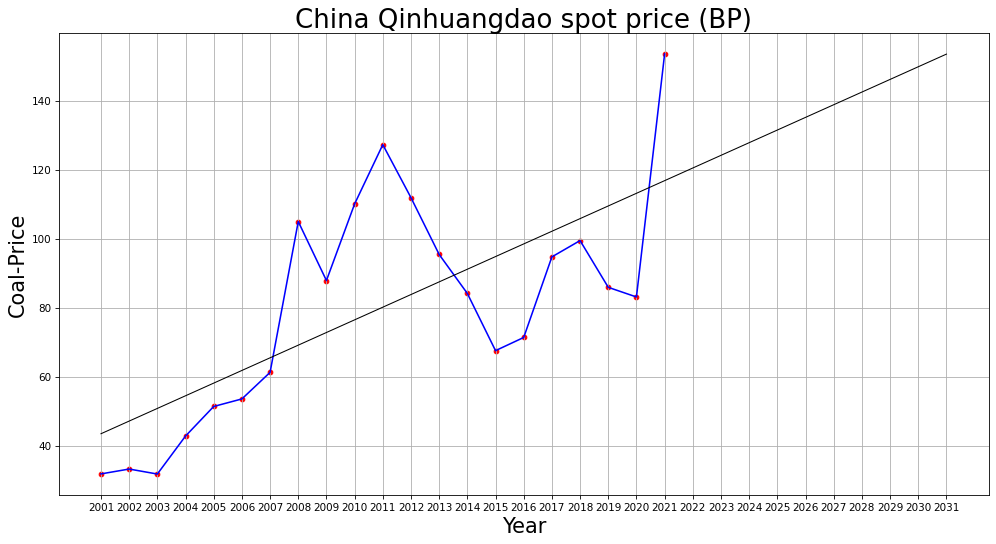

In [52]:
dfChina= df.loc[df['Entity'] == 'China Qinhuangdao spot price (BP)'].reset_index()
ChinaQ = graph_maker(dfChina)
plt.title("China Qinhuangdao spot price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(ChinaQ[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'China Qinhuangdao spot price VS. Overall Average')

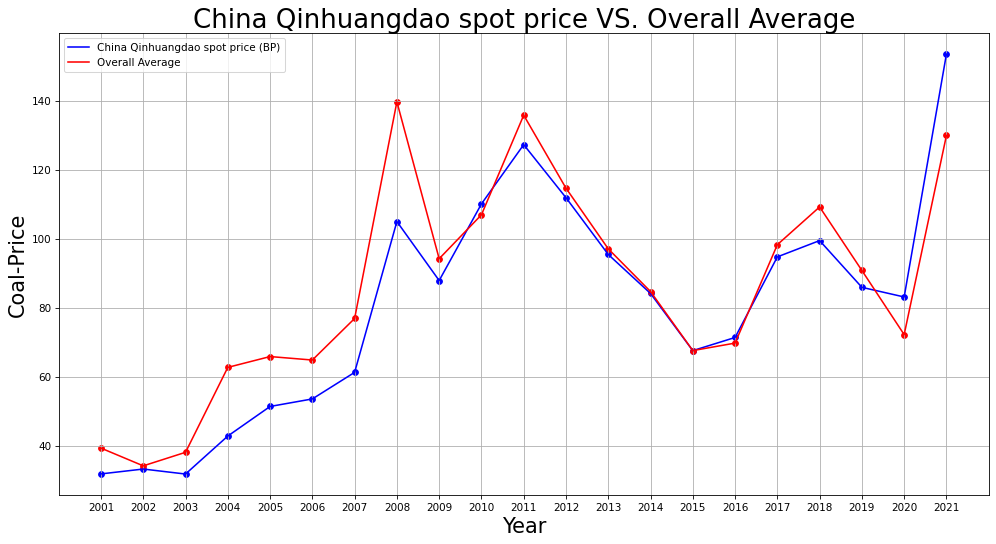

In [53]:
multi_plot(dfChina)
plt.title("China Qinhuangdao spot price VS. Overall Average", size=25)

Dengan pengecualian pada tahun 2020 dan 2021, harga batu bara di Tiongkok cenderung lebih rendah atau hampir setara dengan rata-rata global. Kenaikan harga yang melebihi rata-rata pada periode 2020–2021 kemungkinan besar disebabkan oleh pandemi Covid-19 yang berasal dari Tiongkok. Pandemi tersebut menyebabkan gangguan besar pada rantai pasok, distribusi energi, serta lonjakan permintaan dalam negeri, yang secara keseluruhan mendorong harga batu bara naik lebih tinggi dibandingkan rata-rata global.

### **Japan coking coal import CIF** ###

At year 2031, the predicted coal price will be: 203.74845 USD per tonne.


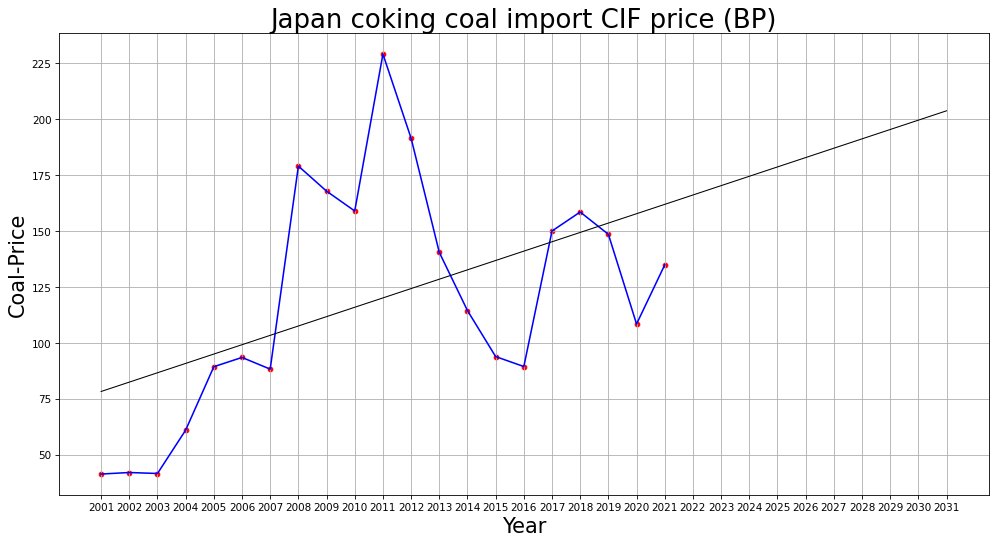

In [54]:
dfJPcc = df.loc[df['Entity'] == 'Japan coking coal import CIF price (BP)'].reset_index()
JPcoco = graph_maker(dfJPcc)
plt.title("Japan coking coal import CIF price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(JPcoco[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'Japan coking coal import CIF price (BP) VS. Overall Average')

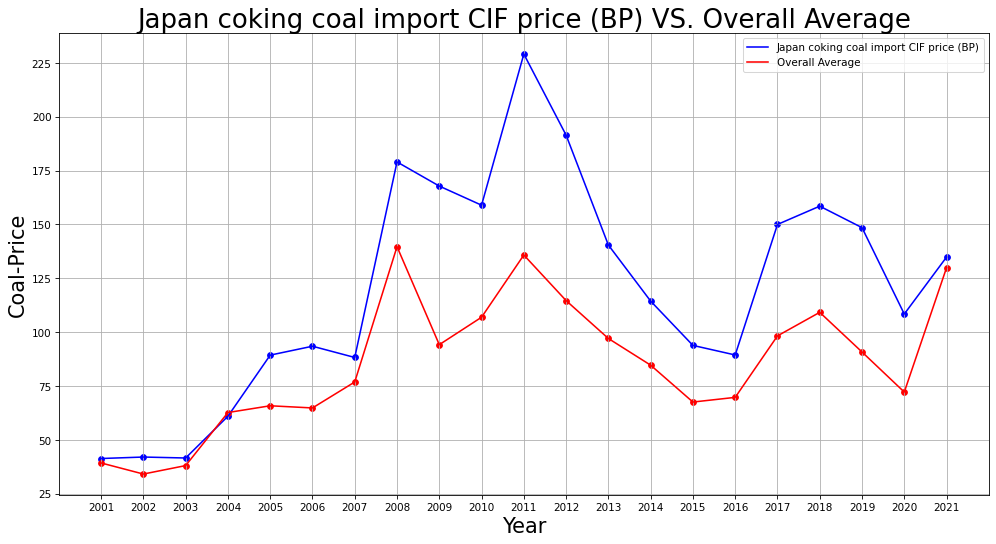

In [55]:
multi_plot(dfJPcc)
plt.title("Japan coking coal import CIF price (BP) VS. Overall Average", size=25)

Harga coking coal Jepang secara konsisten berada di atas rata-rata global sejak tahun 2005. Kenaikan harga yang sangat mencolok terjadi pada tahun 2011, yang hampir dua kali lipat lebih tinggi dibandingkan rata-rata. Lonjakan ini kemungkinan besar disebabkan oleh bencana tsunami Tohoku 2011, yang menyebabkan kerusakan besar pada infrastruktur dan meningkatnya kebutuhan energi secara mendesak, sehingga mendorong harga batu bara naik secara signifikan di Jepang.

### **Japan steam coal import CIF** ###

At year 2031, the predicted coal price will be: 156.98014 USD per tonne.


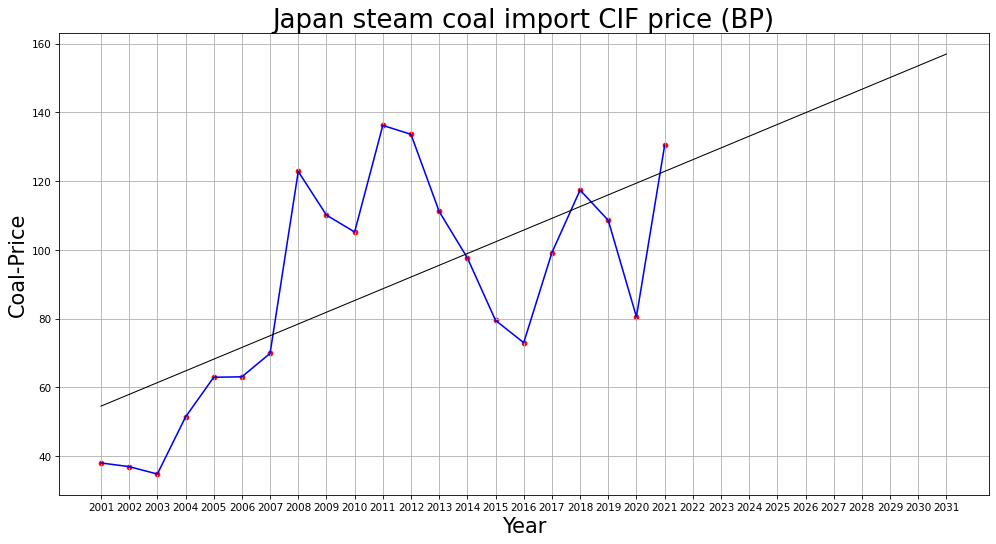

In [56]:
dfJPsc = df.loc[df['Entity'] == 'Japan steam coal import CIF price (BP)'].reset_index()
JPstcoal = graph_maker(dfJPsc)
plt.title("Japan steam coal import CIF price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(JPstcoal[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'Japan steam coal import CIF price (BP) VS. Overall Average')

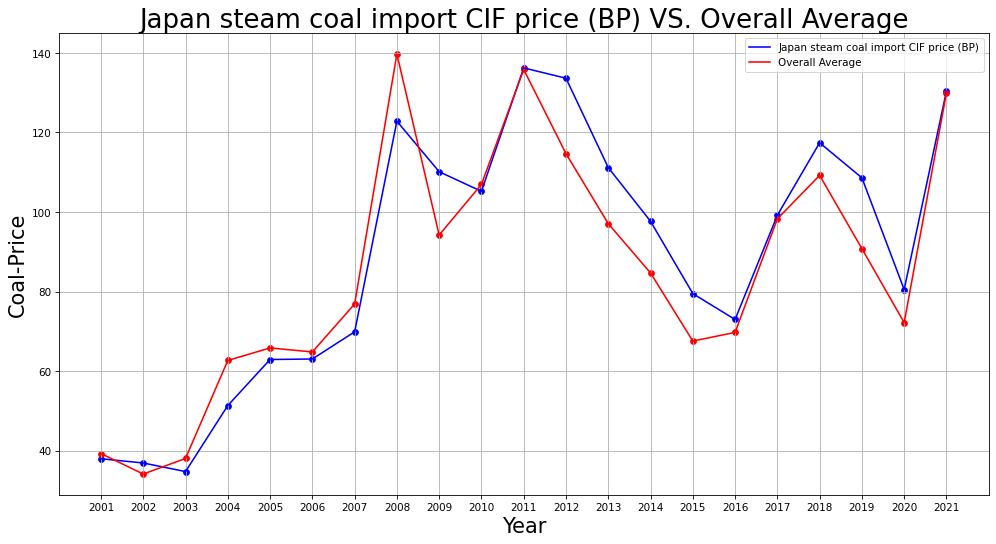

In [57]:
multi_plot(dfJPsc)
plt.title("Japan steam coal import CIF price (BP) VS. Overall Average", size=25)

Berbeda dengan harga coking coal Jepang, harga steam coal Jepang cenderung lebih selaras dengan rata-rata global. Menariknya, kenaikan harga antara tahun 2010–2011 hampir identik dengan tren pada rata-rata keseluruhan. Namun, yang membedakan adalah penurunan harga setelah 2011 tidak terjadi secara signifikan seperti pada rata-rata global. Sebaliknya, harga steam coal Jepang tetap stabil di level yang lebih tinggi dan terus berada di atas rata-rata sejak saat itu, menunjukkan permintaan yang kuat atau ketergantungan energi yang berkelanjutan pasca bencana 2011.

### **Japan steam spot CIF** ###

At year 2031, the predicted coal price will be: 137.46117 USD per tonne.


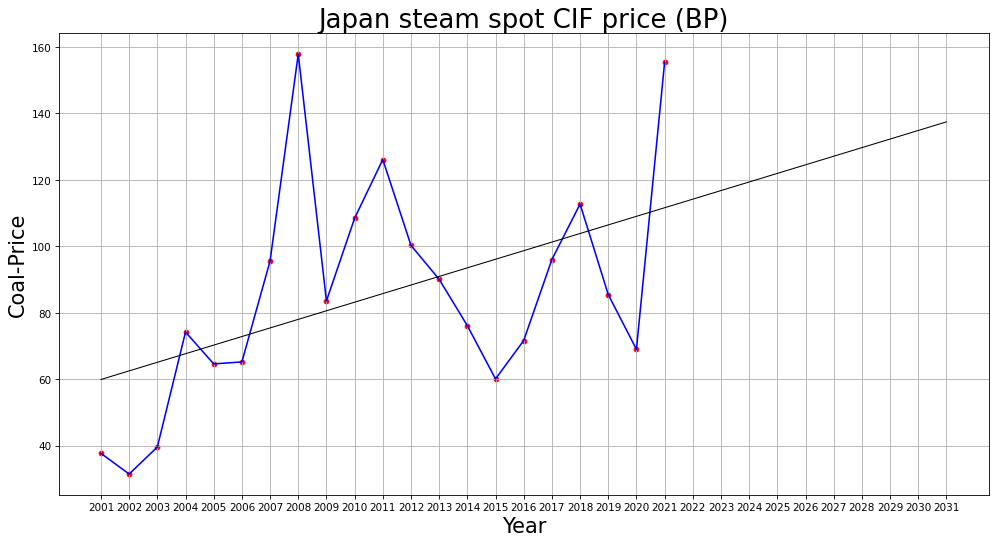

In [58]:
dfJPss = df.loc[df['Entity'] == 'Japan steam spot CIF price (BP)'].reset_index()
JPstspot = graph_maker(dfJPss)
plt.title("Japan steam spot CIF price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(JPstspot[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'Japan steam spot CIF price (BP) VS. Overall Average')

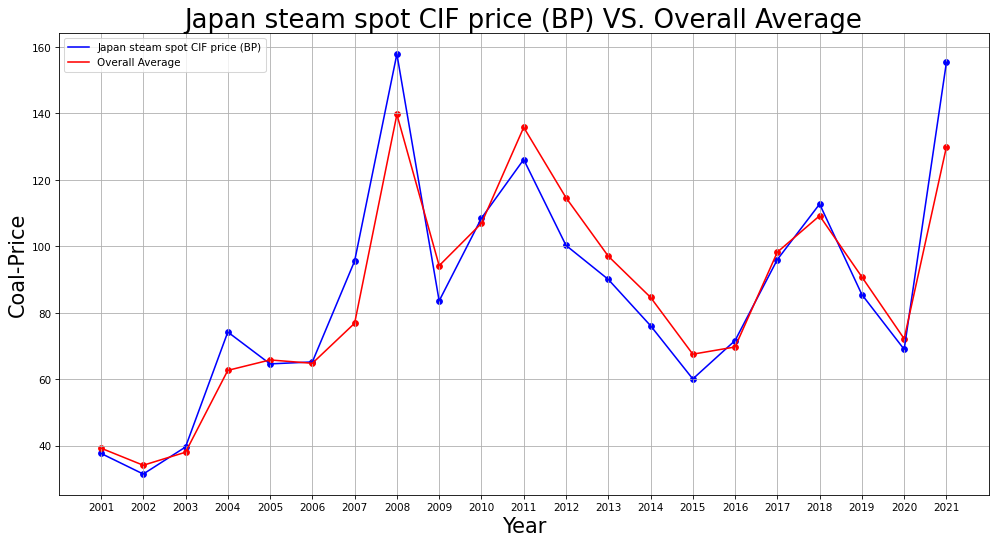

In [59]:
multi_plot(dfJPss)
plt.title("Japan steam spot CIF price (BP) VS. Overall Average", size=25)

Tampaknya prediksi saya bahwa tsunami tahun 2011 akan memberikan dampak signifikan terhadap harga batu bara kembali tidak terbukti. Sama seperti pola pada Japan steam coal, harga batu bara untuk Japan steam spot juga menunjukkan tren yang relatif sejalan dengan rata-rata global. Hal ini mengindikasikan bahwa meskipun bencana tersebut berdampak besar terhadap infrastruktur dan kebutuhan energi Jepang, pengaruhnya terhadap harga batu bara tidak terlalu ekstrem dibandingkan tren global pada saat itu.

### **Northwest Europe marker price** ###

At year 2031, the predicted coal price will be: 104.35224 USD per tonne.


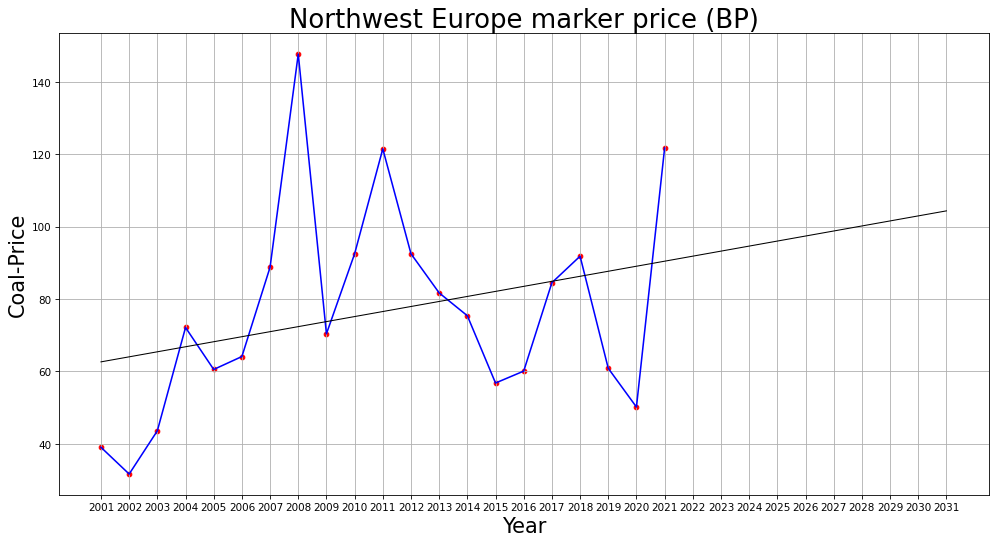

In [60]:
dfNE = df.loc[df['Entity'] == 'Northwest Europe marker price (BP)'].reset_index()
nwEuro = graph_maker(dfNE)
plt.title("Northwest Europe marker price (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(nwEuro[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'Northwest Europe marker price (BP) VS. Overall Average')

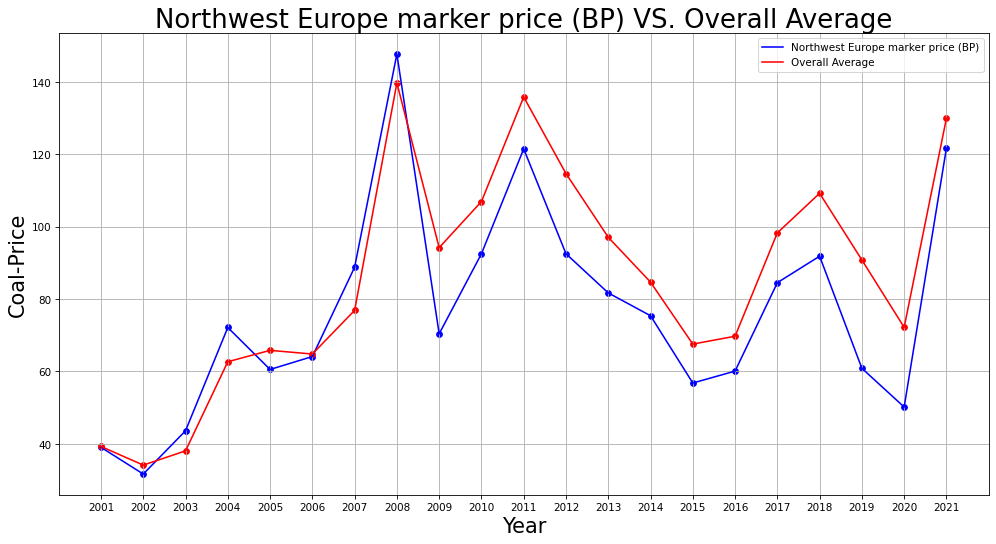

In [61]:
multi_plot(dfNE)
plt.title("Northwest Europe marker price (BP) VS. Overall Average", size=25)

Harga batu bara di Eropa Barat Laut (Northwest Europe) cenderung lebih rendah dibandingkan rata-rata global selama sebagian besar periode data. Hal ini bisa mencerminkan efisiensi rantai pasok regional, kebijakan energi yang lebih stabil, atau alternatif sumber energi yang lebih beragam di kawasan tersebut.

### **US Central Appalachian coal spot** ###

At year 2031, the predicted coal price will be: 69.50063 USD per tonne.


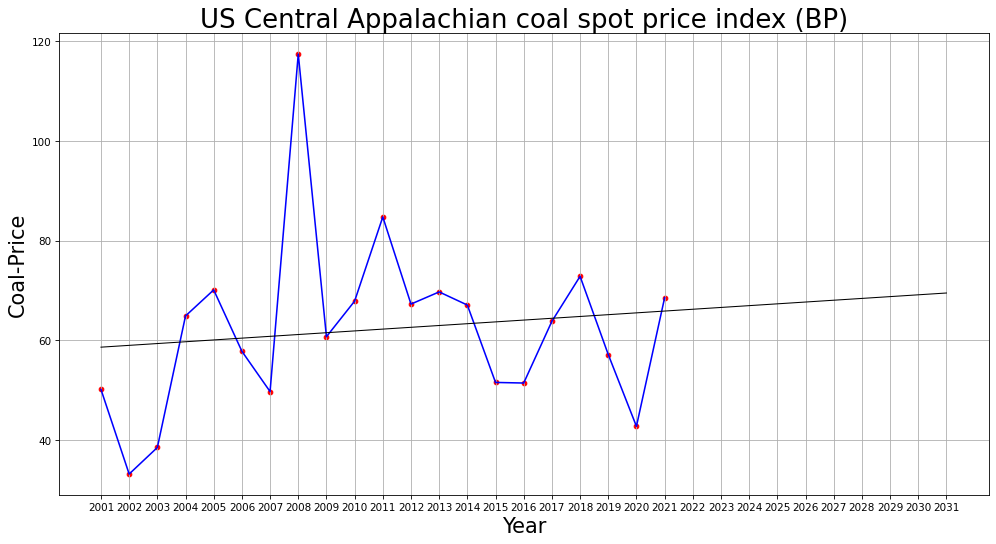

In [62]:
dfUS= df.loc[df['Entity'] == 'US Central Appalachian coal spot price index (BP)'].reset_index()
USCA = graph_maker(dfUS)
plt.title("US Central Appalachian coal spot price index (BP)", size=25)

print("At year 2031, the predicted coal price will be:", round(USCA[-1], 5), "USD per tonne.")

Text(0.5, 1.0, 'US Central Appalachian coal spot price index (BP) VS. Overall Average')

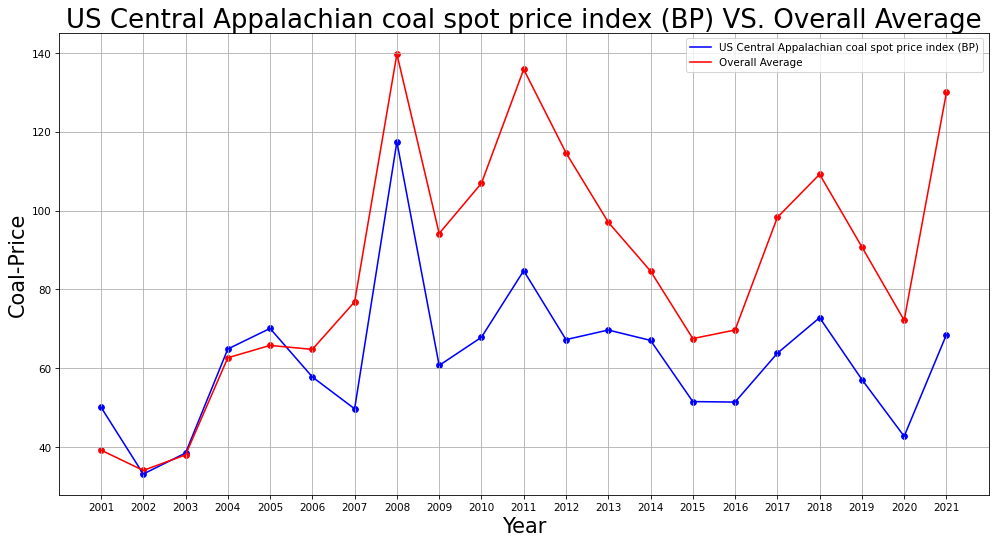

In [63]:
multi_plot(dfUS)
plt.title("US Central Appalachian coal spot price index (BP) VS. Overall Average", size=25)

Perbedaan harga antara US Central (Appalachia) dan rata-rata global terlihat sangat mencolok—bahkan bisa dibilang cukup drastis. Meskipun saya sudah mengetahui bahwa Pegunungan Appalachian dikenal sebagai wilayah kaya tambang batu bara, saya tetap terkejut melihat betapa rendahnya harga batu bara dari wilayah ini dibandingkan rata-rata menurut data BP. Seperti yang telah diperkirakan, kenaikan harga pada tahun 2021 tidak terlalu tajam seperti di wilayah lain, namun masih mengikuti tren global secara umum. Hal ini menunjukkan bahwa meskipun ada keterkaitan global, harga batu bara di Appalachia tetap dipengaruhi kuat oleh faktor lokal seperti biaya produksi, infrastruktur, dan permintaan domestik.

## **4. Tinjauan dan Kesimpulan** ##

Analisis data harga batu bara selama periode 2001–2021 menunjukkan bahwa secara umum terjadi tren kenaikan harga, dengan dua lonjakan utama pada tahun 2008 (krisis keuangan global) dan 2021 (pandemi Covid-19). Rata-rata harga global memberikan gambaran umum, namun masing-masing entitas menunjukkan variasi yang menarik.

Beberapa temuan penting dari analisis ini antara lain:

- Asian Marker menunjukkan tren yang sangat mirip dengan rata-rata global, menandakan ketergantungan tinggi pasar Asia terhadap dinamika global.

- Tiongkok memiliki harga batu bara yang cenderung di bawah rata-rata, kecuali pada 2020–2021 ketika pandemi memberi dampak besar terhadap pasokan dan permintaan domestik.

- Jepang, khususnya untuk coking coal, memiliki harga yang secara konsisten lebih tinggi dari rata-rata sejak 2005. Kenaikan tajam tahun 2011 kemungkinan terkait dengan bencana tsunami Tohoku, meskipun tidak terlihat dampak serupa pada jenis steam coal dan steam spot.

- Eropa Barat Laut memiliki harga yang stabil dan umumnya di bawah rata-rata, mungkin karena diversifikasi energi dan efisiensi pasar.

- Wilayah US Central (Appalachia) menunjukkan harga yang jauh lebih rendah dari rata-rata global sepanjang waktu, meskipun tetap mengikuti pola tren umum terutama pada tahun 2021.

Secara keseluruhan, meskipun terdapat tren global yang kuat, faktor lokal seperti bencana alam, kebijakan energi, letak geografis, dan efisiensi pasar sangat mempengaruhi perbedaan harga batu bara antar entitas. Analisis ini menunjukkan pentingnya mempertimbangkan konteks regional saat mengevaluasi dinamika pasar energi dunia.

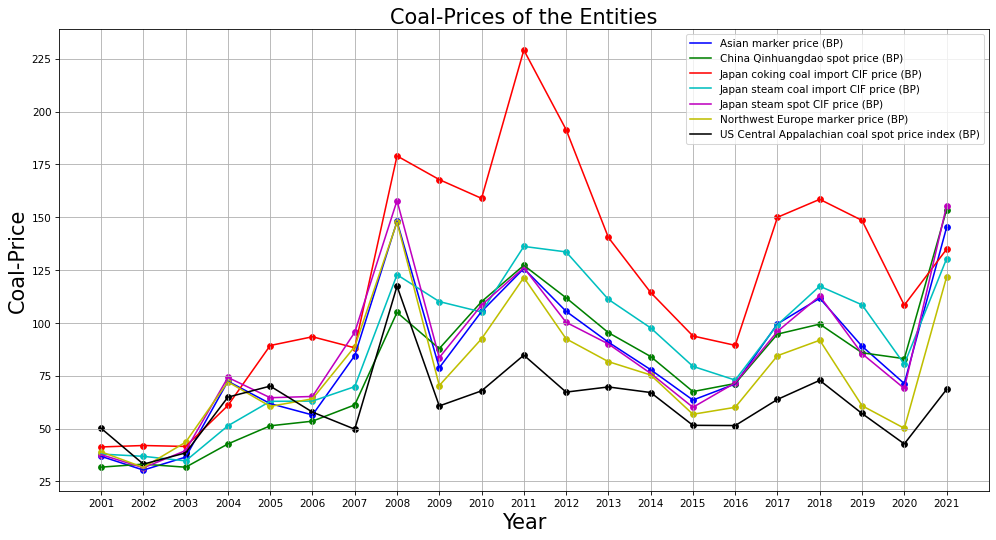

In [64]:
xaxis = np.arange(2001,2022,1)
plt.figure(figsize=(16, 8), dpi=75)

#Asian marker price = blue
plt.scatter(x=dfAsian.Year, y=dfAsian['Coal-Prices'], s=30, color='b')
plt.plot(dfAsian.Year, dfAsian['Coal-Prices'], color='b', label=dfAsian._get_value(0,'Entity'))

#China Qinhuangdao spot price = green
plt.scatter(x=dfChina.Year, y=dfChina['Coal-Prices'], s=30, color='g')
plt.plot(dfChina.Year, dfChina['Coal-Prices'], color='g', label=dfChina._get_value(0,'Entity'))

#Japan coking coal import CIF price = red
plt.scatter(x=dfJPcc.Year, y=dfJPcc['Coal-Prices'], s=30, color='r')
plt.plot(dfJPcc.Year, dfJPcc['Coal-Prices'], color='r', label=dfJPcc._get_value(0,'Entity'))

#Japan steam coal import CIF price = cyan
plt.scatter(x=dfJPsc.Year, y=dfJPsc['Coal-Prices'], s=30, color='c')
plt.plot(dfJPsc.Year, dfJPsc['Coal-Prices'], color='c', label=dfJPsc._get_value(0,'Entity'))

#Japan steam spot CIF price = magenta
plt.scatter(x=dfJPss.Year, y=dfJPss['Coal-Prices'], s=30, color='m')
plt.plot(dfJPss.Year, dfJPss['Coal-Prices'], color='m', label=dfJPss._get_value(0,'Entity'))

#Northwest Europe marker price = yellow
plt.scatter(x=dfNE.Year, y=dfNE['Coal-Prices'], s=30, color='y')
plt.plot(dfNE.Year, dfNE['Coal-Prices'], color='y', label=dfNE._get_value(0,'Entity'))

#US Central Appalachian coal spot price index = black
plt.scatter(x=dfUS.Year, y=dfUS['Coal-Prices'], s=30, color='k')
plt.plot(dfUS.Year, dfUS['Coal-Prices'], color='k', label=dfUS._get_value(0,'Entity'))

plt.xticks(xaxis)
plt.xlabel('Year', size=20)
plt.ylabel('Coal-Price', size=20)
plt.title('Coal-Prices of the Entities', size=20)
plt.grid()
plt.legend()

# **5. Membuat Model ARIMA**

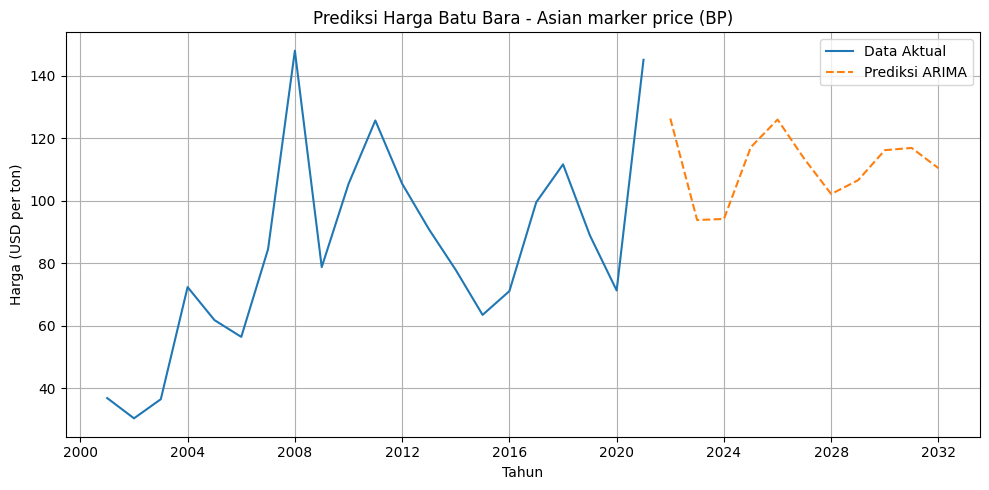

In [76]:
# Gunakan entitas tertentu
entity = 'Asian marker price (BP)'
df_entity = df[df['Entity'] == entity].copy()

df_entity.rename(columns={'Coal - Prices': 'Coal_Prices'}, inplace=True)

# Konversi ke format datetime tahunan
df_entity['Year'] = pd.to_datetime(df_entity['Year'], format='%Y')

# Set indeks menjadi datetime dan pastikan frekuensi tahunan awal
ts = df_entity.set_index('Year')['Coal_Prices']
ts.index = pd.date_range(start=f"{ts.index.year.min()}", periods=len(ts), freq='YS')  # YS = Year Start

# Hanya ambil data sampai 2021
ts = ts[ts.index.year <= 2021]

# Buat dan fit model ARIMA
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()

# Prediksi hingga tahun
last_year = ts.index[-1].year
n_years = 2032 - last_year

if n_years > 0:
    forecast = model_fit.forecast(steps=n_years)
    forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(years=1), periods=n_years, freq='YS')
    forecast_series = pd.Series(forecast, index=forecast_index)

    # Visualisasi
    plt.figure(figsize=(10, 5))
    plt.plot(ts, label='Data Aktual')
    plt.plot(forecast_series, label='Prediksi ARIMA', linestyle='--')
    plt.title(f'Prediksi Harga Batu Bara - {entity}')
    plt.xlabel('Tahun')
    plt.ylabel('Harga (USD per ton)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Data sudah mencakup tahun 2032 atau lebih.")


Grafik di atas menunjukkan hasil prediksi harga batu bara menggunakan model ARIMA berdasarkan data historis dari tahun 2001 hingga 2021 untuk entitas "Asian marker price (BP)". Garis biru merepresentasikan harga aktual yang fluktuatif, dengan lonjakan signifikan pada tahun 2008 dan 2021. Sementara itu, garis oranye putus-putus menunjukkan prediksi harga hingga tahun 2032, yang memperlihatkan tren stabil dengan fluktuasi moderat di kisaran 90–130 USD per ton. Model ini berhasil menangkap pola historis dan memberikan proyeksi yang realistis, berguna sebagai dasar pengambilan keputusan dalam analisis pasar energi.

# **6. Evaluasi Model**

In [75]:
# Ambil data aktual 2019–2021
test_actual = ts[ts.index.year >= 2019]

# Prediksi ulang hanya untuk 2019–2021
test_years = len(test_actual)
test_pred = model_fit.predict(start=len(ts) - test_years, end=len(ts) - 1, typ='levels')

# Evaluasi
mae = mean_absolute_error(test_actual, test_pred)
mse = mean_squared_error(test_actual, test_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_actual - test_pred) / test_actual)) * 100

print(f"Evaluasi ARIMA (Prediksi 2019–2021):")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"MAPE = {mape:.2f}%")


Evaluasi ARIMA (Prediksi 2019–2021):
MAE  = 22.16
MSE  = 705.59
RMSE = 26.56
MAPE = 23.91%


Evaluasi performa model ARIMA untuk prediksi harga batu bara pada periode 2019–2021 menunjukkan hasil yang cukup baik. Nilai Mean Absolute Error (MAE) sebesar 22.16 dan Root Mean Square Error (RMSE) sebesar 26.56 mengindikasikan bahwa rata-rata selisih antara nilai aktual dan prediksi berada di kisaran tersebut. Sementara itu, Mean Absolute Percentage Error (MAPE) sebesar 23.91% menandakan bahwa model memiliki tingkat akurasi prediksi yang cukup layak, dengan kesalahan relatif kurang dari 25%. Hasil ini menunjukkan bahwa model ARIMA mampu menangkap tren harga dengan cukup baik dalam jangka pendek.